In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from matplotlib.ticker import PercentFormatter


In [3]:
#print(f'pandas : {pd.__version__}')

For the path name
<br>Not : ".\netflix_movies_and_tv_shows.xlsx"
<br>Yes : "netflix_movies_and_tv_shows.xlsx"

index_col is a relative index. Therefore, if I specify usecols, then i need to use index relatively correspond to those columns in usecols.

In [ ]:
path = "netflix_movies_and_tv_shows.xlsx"
df = pd.read_excel(io = path, usecols="B:L",index_col=None)
#df.head(20)
#df.info()

In [5]:
#df[df['title']=='The Memphis Belle: A Story of a']  #a row has lots of NaN 

## Let's see how duration of TV show spreads
1. Extract duration column
2. Data cleansing: Remove rows that have NaN or string that is not time
2. Split the data into min column and season column
2. Plot bar or hisotgram

In [5]:
duration_data=df["duration"].copy(deep=True)
#duration_data.iloc[2018]  #it gives 'This documentary centers on the crew of the B-17 Flying Fortress Memphis Belle as it prepares to execute a strategic bombing mission over Germany.'



In [3]:
#A Function to get a filter list to remove data in series
def get_filter_list(series,pattern):#series is dataframe.series
    series_TF=series.str.contains(pattern,regex=True)
    #print(series_TF)
    filter_list=list(series_TF[series_TF==False].index)#list() can turn any iterator to list
    return filter_list

In [6]:
duration_data.drop(index=get_filter_list(duration_data,"^\d+\s\D+"),inplace=True) #drop value that does not match "^\d+\s\D+"
#duration_data.iloc[2018]


In [7]:
duration_data.dropna(inplace=True) #drop NaN and replace the original data, finally all NaN and unsuitable string are removed



In [67]:
duration_data_seasons=duration_data.drop(index=get_filter_list(duration_data,"^\d+\sSeasons?$"),inplace=False)
#duration_data_seasons
duration_data_mins=duration_data.drop(index=get_filter_list(duration_data,"^\d+\smins?$"),inplace=False)
duration_data_mins.str.strip()
#duration_data_mins

0        90 min
1        94 min
4        99 min
6       110 min
7        60 min
         ...   
5579     70 min
5580    102 min
5581     88 min
5582    109 min
6233     60 min
Name: duration, Length: 4264, dtype: object

In [70]:
#Method 1: Use Counter() and plt.bar to plot the graph for duration_data_mins


c=Counter(duration_data_mins) #gives a dict
#most_common() Return a list of the n most common elements and their counts from the most common to the least. If n is omitted or None, most_common() returns all elements in the counter. 
labels,values=zip(*c.most_common(20)) #  The zip() function returns a zip object, which is an iterator of tuples where the first item in each passed iterator is paired together, and then the second item in each passed iterator are paired together etc.
#print(labels)

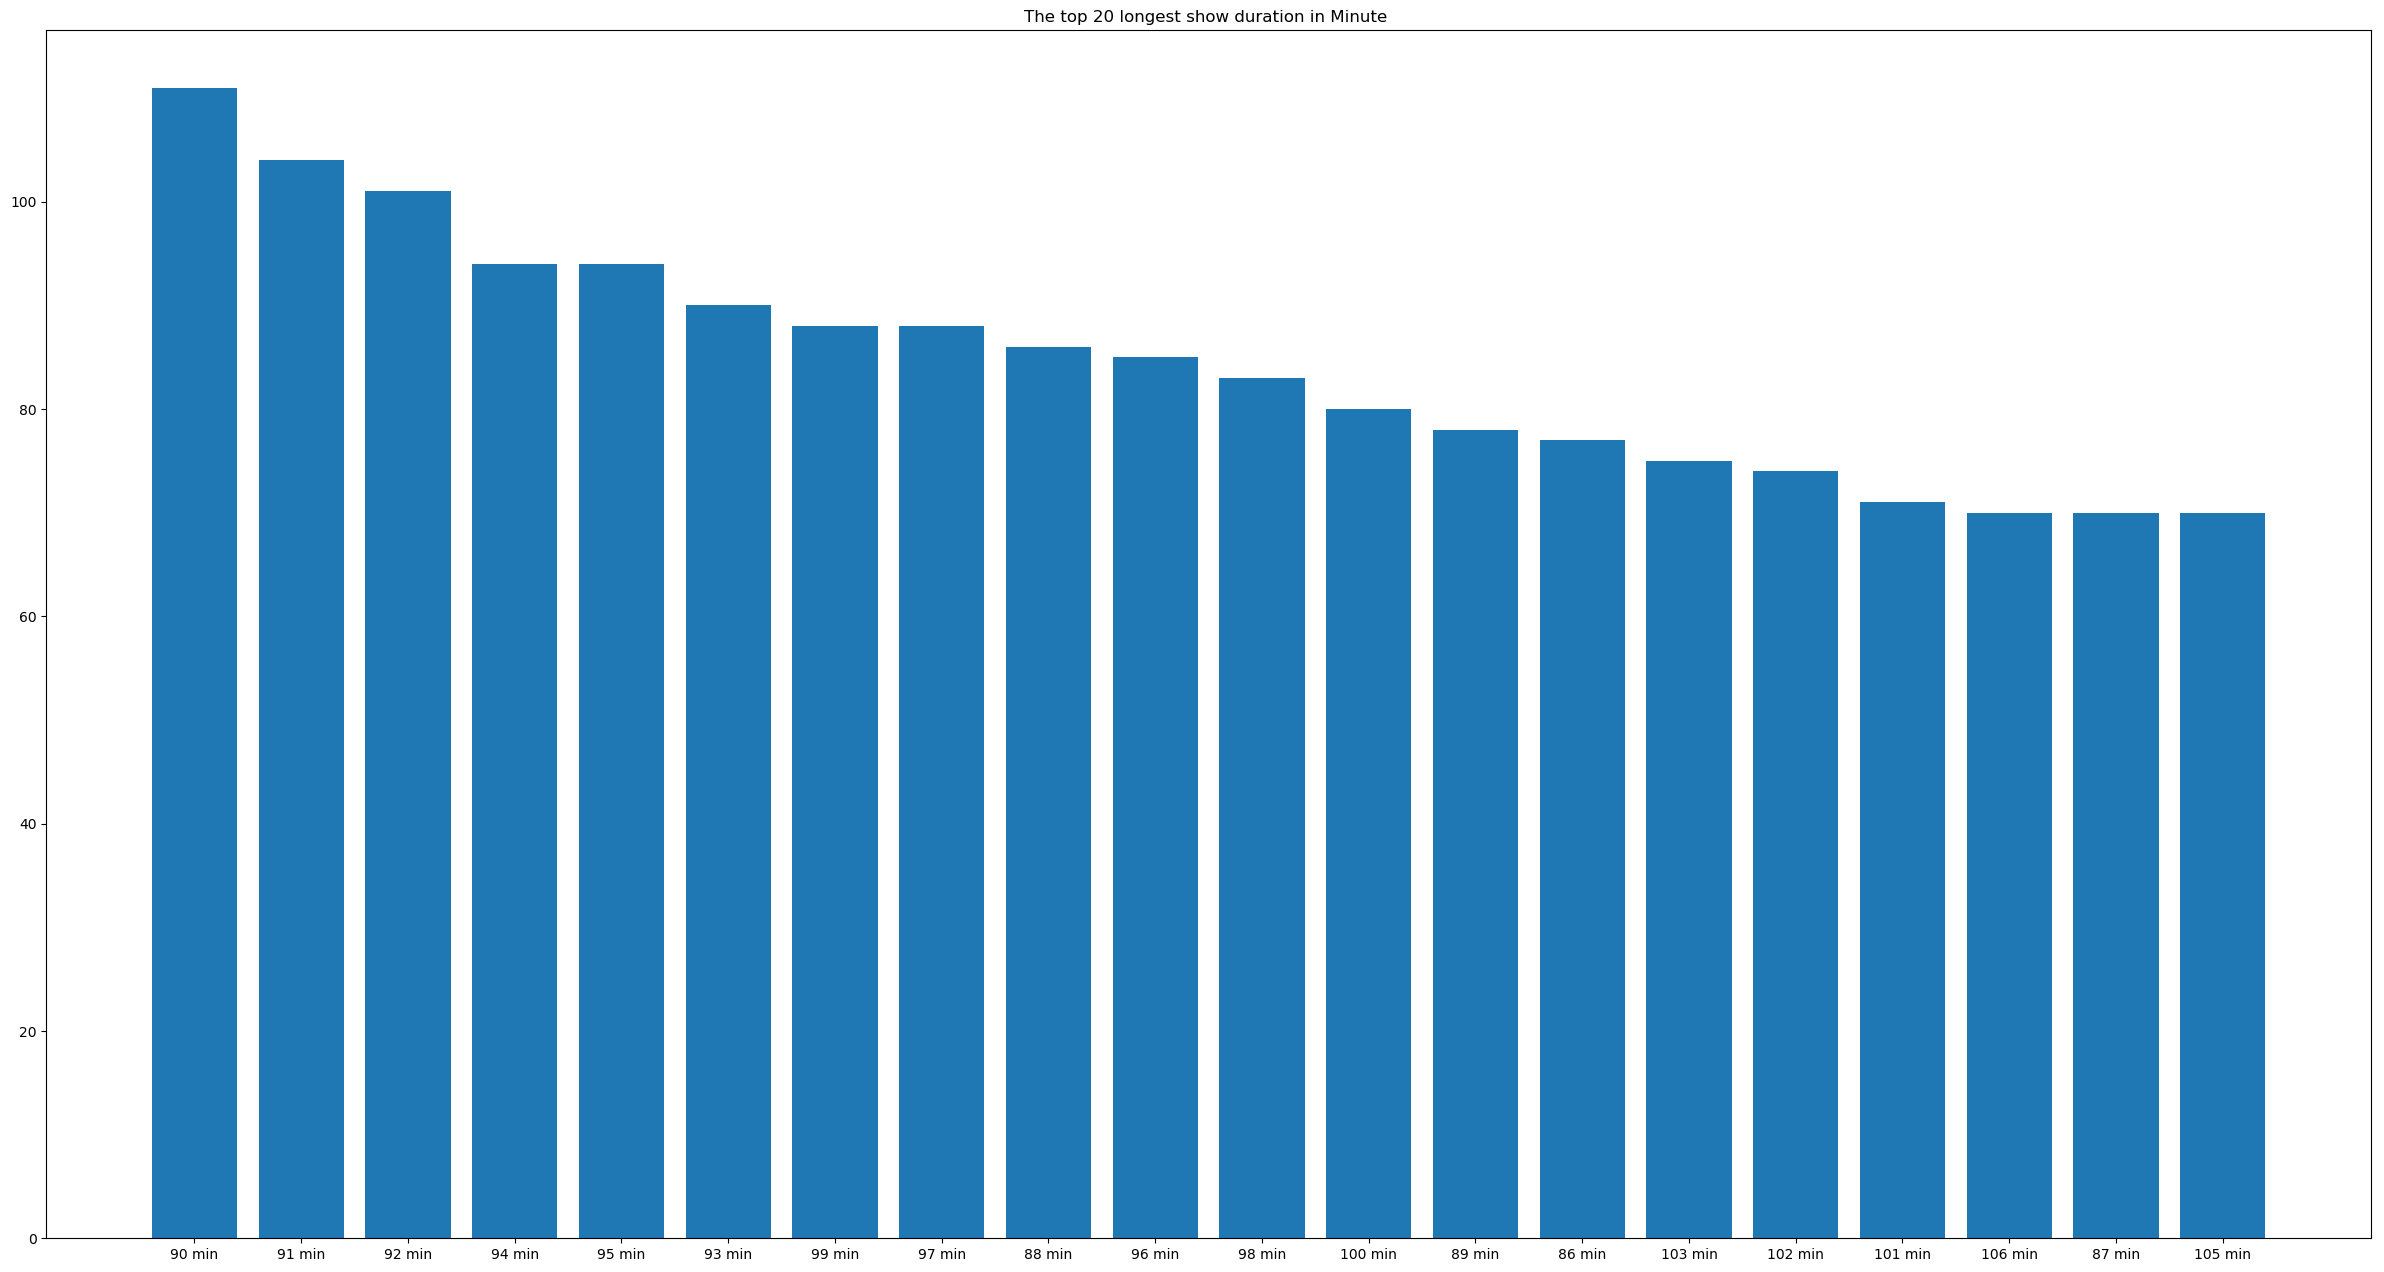

In [73]:
plt.figure(1,figsize=(30,16),dpi=100)
position=np.arange(0,len(labels))
plt.bar(position,values)#width of bin defaults 0.8
plt.xticks(position,labels)
plt.title('The top 20 longest show duration in Minute ')
plt.show()

In [72]:
#Method 2: Use the in-built plot.hist for dataframe.series
#I failed to use this method...Problem related int(), some '' produced and i cant get rid of them..
#you can find there is weird new line using the code below to check
#for i in duration_data_mins:
    #print(i)
    #for j in i:
     #   print(j.isdigit())

#duration_data_mins.str.strip().sort_values(key=lambda x: int(''.join(filter(None,[i for i in x if i.isdigit()]))))





In [ ]:
cc=Counter(duration_data_seasons)
labels,values=zip(*cc.most_common())
plt.figure(2,figsize=(30,16))
position=np.arange(0,len(labels))
plt.bar(position,values)
plt.xticks(position,labels)
plt.title('Duration of TV show in unit season')
plt.show()

In [20]:
date_added_data=df['date_added']
date_added_data.head()
print('The oldest date added is',min(date_added_data))
print('The latest date added is',max(date_added_data))


The oldest date added is 2008-01-01 00:00:00
The latest date added is 2020-01-18 00:00:00


## What countries ever participated in producing the contents?

In [3]:
countries_data=df['country']
#countries_data.head(50)
#countries_data.isna()

In [4]:
countries_data_processed=[]
for nation in countries_data:
    try:
       temp = filter(None,nation.split(',')) #remove ''
    except:
        continue
    else:
        countries_data_processed.extend(temp)

countries_data_processed=[nation.strip() for nation in countries_data_processed]
#filter: Return an iterator yielding those items of iterable for which function(item) is true.
#bool() get T/F value. Return True if a string matches '\D+'
countries_data_processed=filter(lambda x:bool(re.match('\D+',x)),countries_data_processed)  

#########
#I used set() to find all unique countries
#countries_data_processed=set(countries_data_processed)
#print("There are",len(countries_data_processed),"countries/districts involved!")
#print(countries_data_processed)
#########

########
#Get a series that shows number of production of each country
#Arrange from the highest number to the lowest number
countries_data_processed = pd.Series(dict(Counter(countries_data_processed))).sort_values(ascending=False) #Counter is a sub-class of dict,dict() turns it to dictionary
##Reference to https://www.kaggle.com/subinium/storytelling-with-data-netflix-ver/data , Use Pareto principle(80/20 rule)
total=sum(countries_data_processed)
top_20_percent = sum(countries_data_processed[0:int(len(countries_data_processed.index)*0.2)]) #There is 22 countries for top 20%
print(f'The number of production from the top 20% countries accounts for: {top_20_percent}/{total} = {top_20_percent/total * 100}% of the total produciton')


The number of production from the top 20% countries accounts for: 6423/7178 = 89.48174979102814% of the total produciton


In [5]:
countries_data_processed = pd.DataFrame(countries_data_processed)#change from Series back to dataframe
countries_data_processed.columns=['country']  #columns is one of the attribute of dataframe, call it to change name
#countries_data_processed.info()

In [6]:
countries_data_processed['cumpercentage'] = countries_data_processed['country'].cumsum()/total * 100 
#countries_data_processed.info()

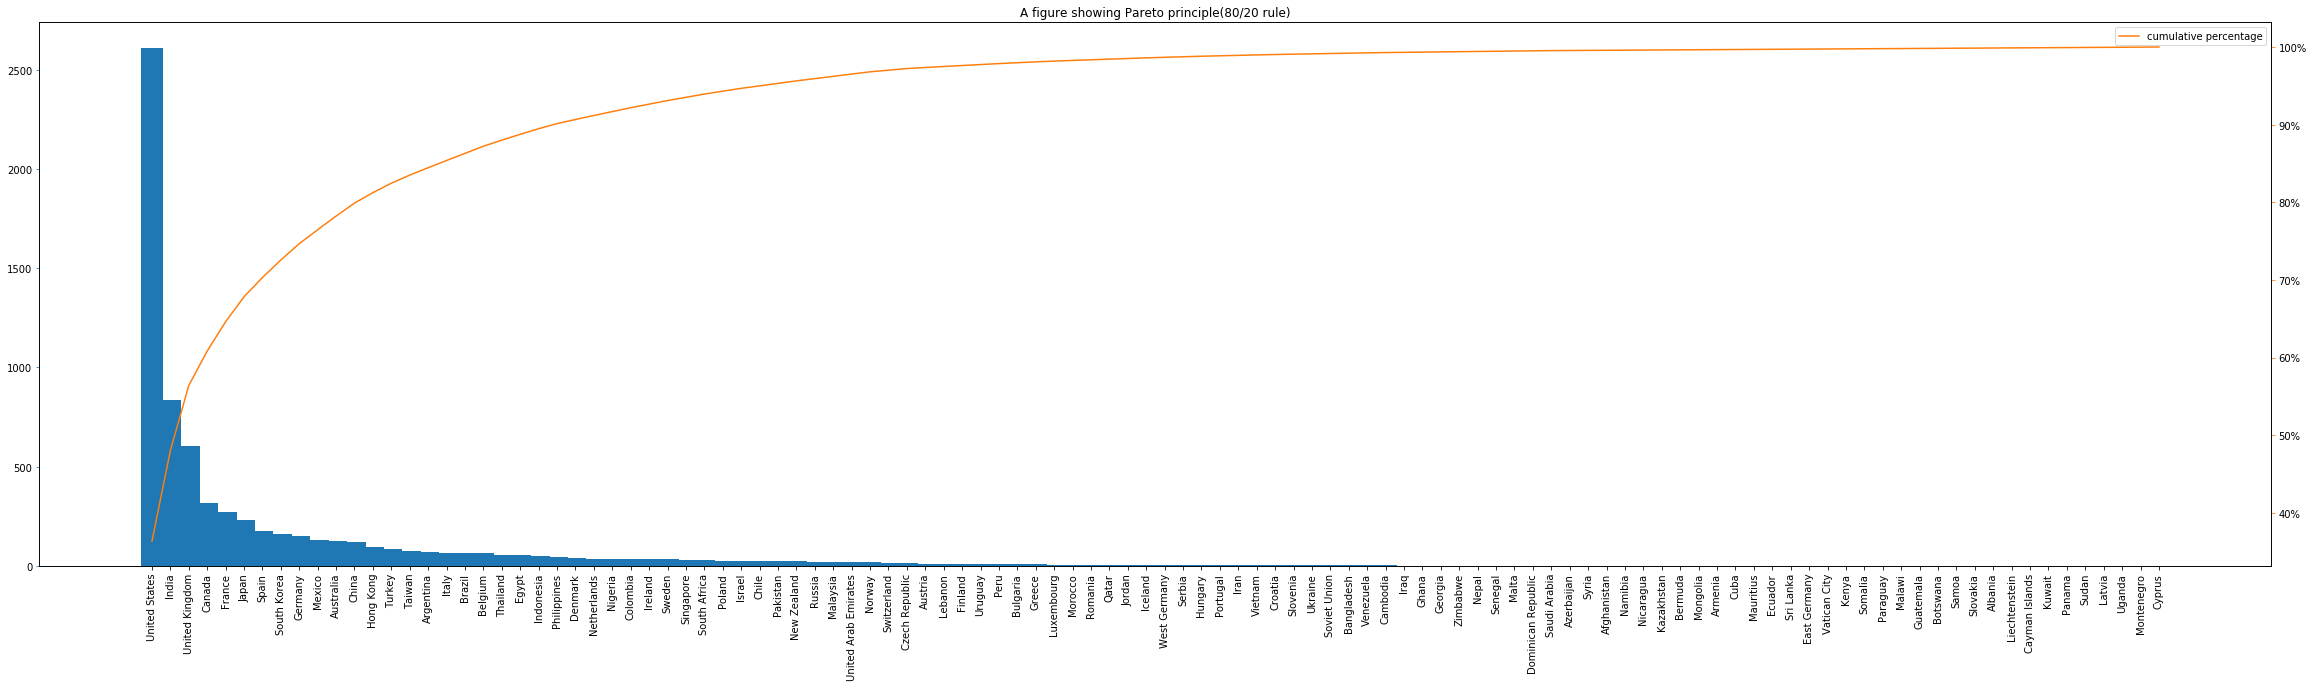

In [9]:
#plot the bar chart and cumulative curve together
fig = plt.figure(figsize=(40,10))
ax = fig.subplots()
ax.bar(countries_data_processed.index, countries_data_processed["country"], color="C0",width = 1.2)
ax.set_xticklabels(labels=countries_data_processed.index,rotation='vertical')
ax2 = ax.twinx()
ax2.plot(countries_data_processed.index, countries_data_processed["cumpercentage"], color="C1", ms=7,label="cumulative percentage",)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis='y',color='C0')
ax2.tick_params(axis='y',color='C1')
plt.legend()
plt.title("A figure showing Pareto principle(80/20 rule)")
plt.show()

pandas._libs.tslibs.nattype.NaTType

In [103]:
df = df.dropna(subset=['country','date_added']).reset_index()#already able to remove NaN and NaT along both columns
                                                              #reset the index 

0

In [104]:
df['year_added']=df['date_added'].apply(lambda x :str(x).split('-')[0].strip())

In [105]:
df['country']=df['country'].apply(lambda x : x.replace(' ,',',').replace(', ',',').split(',')) #each row in Country is a list

In [115]:
df[['country','year_added']].head()

,country,year_added
0,"[United States, India, South Korea, China]",2019
1,[United Kingdom],2016
2,[United States],2018
3,[United States],2018
4,[United States],2017


In [112]:
df2=pd.DataFrame({
    'year_added':np.repeat(df['year_added'].values,df['country'].str.len())
})

In [116]:
df2.head(8)

,year_added
0,2019
1,2019
2,2019
3,2019
4,2016
5,2018
6,2018
7,2017


In [107]:
np.concatenate(df['country'].values) #the first time i tried to concatenate one nparray and it just  combines all elements...

array(['United States', 'India', 'South Korea', ..., 'Canada', 'Japan',
       'United States'], dtype='<U20')

array([1, 2, 3, 4])